<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 02</font></center></h1>
<h2><center> <font color='black'> Regression & Regularization</font></center></h2>    
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu - Spring 2023</font></center></h2>
</div>

# Homework instructions

- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID.

- Please provide code where ever applicable.

- The accepted submission format is .ipynb file. Please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close on <font color='red'>**19 March at 23:59**</font>, so please make sure to submit before the deadline. 

- ONLY one of the teammates should submit the homework and in the submission description the other person's Name and Student ID must be entered. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY. 

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues. 

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://ut.ee/en/content/academic-fraud).

- <font color='red'>**DO NOT CHANGE THE TEMPLATE**</font>

- <font color='red'>**Restart the Kernel and Run all the cells once again after you are done.**</font>
This will ensure that all the cells run without error. You will find an option in the top menu bar under Kernel tab. 

**<h2><font color='red'>Team mates:</font></h2>**

<font color='red'>Name: Samir Musali </font>&emsp;   <font color='red'>Student ID: C29810 </font>

# Introduction

* In this homework you are going to apply supervised learning: Linear Regression method using Scikit-learn package; Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy [https://en.wikipedia.org/wiki/Scikit-learn].

### The homework is divided into four sections and the points are distributed as below:
<pre>
- Linear Regression    -> 3 points
- PCA                  -> 3 points
- Overfitting          -> 5 points
_________________________________________
Total                  -> 11 points
</pre>

# 1. Regression 
## 1.1 Linear Regression (2 points)

We are going to use the Prices dataset that contains 74 columns. Each column represents a feature of houses for sale. The ```SalePrice``` column  shows their prices. 

In [ ]:
import pandas as pd
data = pd.read_csv("Prices.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


The column names are self-explanatory which indicates features of each house.

**1.1.1. The target label is```SalePrice``` which means, later we will predict the sale-price based on the given features (columns). But for regression task, it is important to ensure that the data is not skewed. In order to do that, please plot the distribution of ```SalePrice``` column and explain what do you see. (0.35 point)**

<Axes: xlabel='SalePrice', ylabel='Count'>

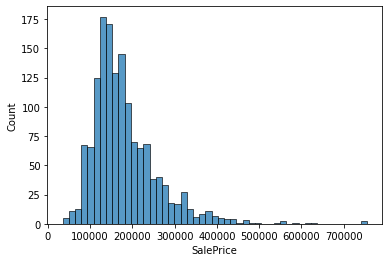

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(5)
sns.histplot(data=data, x="SalePrice")

**<font color='red'>Answer:</font>** 

So, the data seems to be skewed which has to be fixed otherwise it may lead to erronous result. 
Apart from that, look closely, some columns are not numerical. For those, you have to convert them to numerical value or represent them in a way so that the algorithm can understand the data. One of such way is called, one hot encoding. Along with that, the algorithm cannot deal with NaN or Infinite values. So please address all of these in the preprocessing section. 

- Preprocess for skewed data
- Apply one-hot encoding to categorical data types
- Replace negative infinite values with 0

**1.1.2. After preprocessing the skewed data, plot ```SalePrice``` column distribution again. (0.15 point)**

<ipython-input-17-d8f32911b1e1>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], fit=norm);


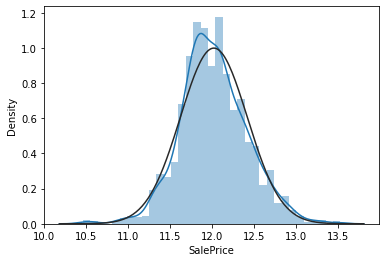

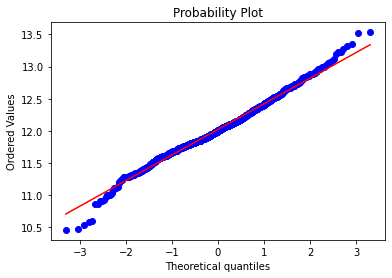

In [ ]:
from scipy.stats import norm
from scipy import stats
# Pre-process:
data['SalePrice'] = np.log(data['SalePrice'])

# Distribution Plot:
sns.distplot(data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

<font color='red'> **Answer:**</font>

**1.1.3. Calculate the correlation between price and each feature. Which are the top 3 features that have the highest correlation with  price? Is the correlation positive or negative? Explain what happens with the price when each of those 3 features change (consider only one feature at a time) and others are kept constant. (0.5 point)** 



In [ ]:
# Replacing Infinite Values with 0:
clean_data = data.replace([np.inf, -np.inf], 0)

# Detecting Null Values
columns_with_miss = clean_data.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print('Null-valued Columns:', len(columns_with_miss))
print('\n')

columns_with_miss.sort_values(ascending=False)

Null-valued Columns: 14




LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64

<font color='red'> **Answer:**</font>

**1.1.4.  Now you have to build a regression model that would be trained on training data and later predict the price on test data. You are free to select features on which you want train the model. The dataset has missing values, so please apply the following methods for dealing with the missing data in the features of your choice:**

a) mean imputation

b) median imputation

c) mode imputation

d) dropping missing values

**Split dataset into the training (80% of the all rows) and test ( 20% of all rows) set, you can use train_test_split function from scikit-learn. While splitting, set the parameter random_state equal to 2, this will reproduce similar split during grading.**

**For each of the case report MAE, RMSE and R<sup>2</sup>. Which method works better ?(2.0 points)**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


methods = ['mean imputation', 'median imputation', 'mode imputation', 'dropping missing values']
#Store the result in the following variables
MAE = []
RMSE = []
R2 = []

df = pd.get_dummies(clean_data)

# Mean
mean_imputer = SimpleImputer(missing_values = np.nan , strategy='mean')
result_mean_imputer = mean_imputer.fit_transform(df)
mean_df = pd.DataFrame(result_mean_imputer, columns = df.columns)

# Median
median_imputer = SimpleImputer(missing_values = np.nan , strategy='median')
result_median_imputer = median_imputer.fit_transform(df)
median_df = pd.DataFrame(result_median_imputer, columns = df.columns)

# Mode
mode_imputer = SimpleImputer(missing_values = np.nan , strategy='most_frequent')
result_mode_imputer = mode_imputer.fit_transform(df)
mode_df = pd.DataFrame(result_mode_imputer, columns = df.columns)

# Without NAs
non_na_df = df.dropna()

def model(data):
  default_df = data
  X_train, X_test, y_train, y_test = train_test_split(default_df.loc[:, default_df.columns != 'SalePrice'], default_df['SalePrice'],
  train_size = 0.8,
  test_size = 0.2,
  random_state = 2)
  lr_model = LinearRegression()
  lr_model.fit(X_train, y_train)
  lr_pred = lr_model.predict(X_test)
  lr_pred_tr = lr_model.predict(X_train)
  test_set_mae = mean_absolute_error(y_test, lr_pred)
  MAE.append(test_set_mae)
  test_set_rmse = (np.sqrt(mean_squared_error(y_test, lr_pred)))
  RMSE.append(test_set_rmse)
  lr_wcv_test_set_r2 = r2_score(y_test, lr_pred)
  R2.append(lr_wcv_test_set_r2)
  return MAE, RMSE, R2

model(mean_df)
model(median_df)
model(mode_df)
model(non_na_df)

# Print the Results:
i = 0
for m in methods:
    print("Method: " + m + "  MAE: " + str(MAE[i]) + "  RMSE: " + str(RMSE[i]) + "  R2: " + str(R2[i]))
    i+=1
    


Method: mean imputation  MAE: 0.0871512862162341  RMSE: 0.15692176113734338  R2: 0.8536717866631454
Method: median imputation  MAE: 302.02813620588086  RMSE: 2958.8960440376263  R2: -52026082.92068131
Method: mode imputation  MAE: 0.08714368883068863  RMSE: 0.15691647328262165  R2: 0.8536816482564811
Method: dropping missing values  MAE: 0.09912382147791733  RMSE: 0.22877522593722743  R2: 0.6426794829278946


<font color='red'> **Answer: Ideally, the desired state is RMSE=MAE=0 & R2=1 but in this situation, the closest and the best one is the mode imputation one.**</font>

**Please store the best MAE, RMSE, r2_best score in the following variables. We will use these variable to compare ```1.2.7```**

In [ ]:
# Mode Imputation:
mae_best = MAE[2]    # best MAE
rmse_best = RMSE[2]  # best RMSE
r2_best = R2[2]      # best R2

# 1.2 Principal Component Analysis (PCA) (3 points)
Our model performs quite good. But there is always room to make it better and simpler. By simpler, we mean the reducing the dimensionality of the dataset so that we can have a simpler linear regression model. <br> <br>If you noticed after one-hot encoding, we have 270 features (columns) but all these features do not hold the same level of information. For example, the first feature may hold 50% of the information required to make the linear regression acheive the performance we already had; the last, (feature number 270) may contribute to only 0.0000001% to the total output. Hence, adding this last variable (actually there could be more) to our linear regression model (read equation) will only increase the complexity of the model; space, time and computational complexity. Therefore, it is wise and desirable to make the model simpler yet performing the best (better). 
<br> <br>
One such way to reduce the dimensionality of the dataset is known as Pricipal Component Analysis. Using this method, we can find out which features contribute the most in our model, therefore, we can wisely select how many we need. We will perform, PCA in this section of the homework. <br><br>

*There is another powerful method for dimensionality reduction, named t-SNE. We will use t-sne in future homework. <br><br>*



**1.2.1. From ```1.1.4``` keep the best method to deal with missing values and apply PCA to reduce the number of features. (1 point)**

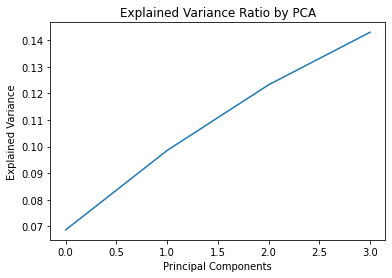

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = mode_df.drop("SalePrice", axis = 1)
y = mode_df["SalePrice"]

# Scale:
scaled_df = StandardScaler().fit_transform(mode_df)
scaled_df= pd.DataFrame(scaled_df, columns=mode_df.columns)
scaled_df.head()

# Fit PCA as Requested:
pca = PCA(whiten=True, svd_solver='randomized', random_state=0)
pca_df = pca.fit_transform(scaled_df)

# Check the Dimensions:
pca_df.shape

# Fit PCA as Requested:
pca = PCA(n_components=4, whiten=True, svd_solver='randomized', random_state=0)
pca_df = pca.fit_transform(scaled_df)

# Explained Variance:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

# Plot:
plt.plot(exp_var_cumul)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio by PCA')
plt.show()

<font color='red'> **Answer:**</font>

**1.2.2. What percentage of the variance is explained by the first five components? (0.25 point)**

<font color='red'> **Answer: Not shown on the graph but probably, ~20% of the variance can be explained by the first 5 components.**</font>

It would be helpful if we could see all of the variance against the number of components, so a plot would give us a better understanding of the situation. 

**1.2.3. Please plot the result of PCA you built in ```1.2.1```<br>
X-axis=Number of Components, Y-axis=Total explained variance and explain the result.(0.5 point)**

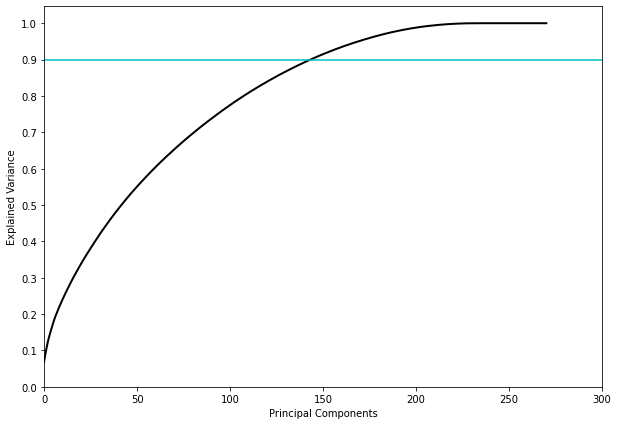

In [ ]:
import matplotlib.pyplot as plt

# Initialize & Fit PCA:
pca = PCA(whiten=True, svd_solver='randomized', random_state=0)
df_pca = pca.fit_transform(scaled_df)

# Explained Variance:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

# Plot:
plt.figure(figsize=(10,7))

lw=2
plt.plot(exp_var_cumul, color='k', lw=lw)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

plt.xlim(0, 300)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axhline(0.9, c='c')
plt.show()

<font color='red'> **Answer: ~90% of the variance can be explained by the first ~150 components, based on this graph; so, the rest might be less beneficial.**</font>

**1.2.5. Again, from ```1.1.4``` keep the best method to deal with missing values and use PCA to reduce the number of features. But you can use only the number of features that are significant in ```1.1.3```, in this case you have to choose an optimum n_component value based on the PCA plot. Otherwise, you can select all of the features and pass the n_components=37. In all cases, keep random_state for PCA equal to 0. (0.25 points)**

In [ ]:
pca = PCA(n_components = 37, whiten=True, svd_solver='randomized', random_state=0)
new_data = pd.DataFrame(pca.fit_transform(X))
new_data = pd.concat([new_data, scaled_df["SalePrice"]], axis=1)

<font color='red'> **Answer:**</font>

**1.2.6. Use the new components derived from PCA to predict the house pricing. Keep the ratio of test and train set to 20/80 and the random_state equal to 0. Report MAE, RMSE and R<sup>2</sup> (0.75 point)** <br>
*Hint: Now your training data is different. Please use pca.transform(X) function to create your new training dataset. But make sure you have the fitted pca from ```1.2.5```*

In [ ]:
methods = ['mean imputation', 'median imputation', 'mode imputation', 'dropping missing value']

MAE = []
RMSE = []
R2 = []

# Split by 80/20:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X,y, train_size = 0.8, test_size = 0.2)

# Fit & Transform PCA:
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

# Start Linear Regression Model:
regressor = LinearRegression()
regressor.fit(X_train_pca, y_train_pca)
lr_predict = regressor.predict(X_test_pca)
lr_predict_train = regressor.predict(X_train_pca)
mae_pca = mean_absolute_error(y_test_pca, lr_predict)
MAE.append(mae_pca)
rmse_pca = (np.sqrt(mean_squared_error(y_test_pca, lr_predict)))
RMSE.append(rmse_pca)
r2_pca = r2_score(y_test_pca, lr_predict)
R2.append(r2_pca)
    
print("MAE: " + str(mae_pca) + "  RMSE: " + str(rmse_pca) + "  R2: " + str(r2_pca))

MAE: 0.09480378398921588  RMSE: 0.14007952745489918  R2: 0.8834186904129737


<font color='red'> **Answer:**</font>

**1.2.7 The following cell would calculate the difference between pre-PCA and post-PCA. Please explain the situation based on the differences. (0.25 point)**

In [ ]:
print("MAE difference after PCA: ", mae_best-mae_pca)
print("RMSE difference after PCA: ", rmse_best-rmse_pca)
print("R2 difference after PCA: ", r2_best-r2_pca)

MAE difference after PCA:  -0.0076600951585272525
RMSE difference after PCA:  0.016836945827722466
R2 difference after PCA:  -0.029737042156492643


<font color='red'> **Answer: Even though we got worse values for these variables, applying PCA made our model simpler than the previous one.**</font>

## 1.3 Overfitting (5 points)

Now our model is comparatively better than the earlier models. It is less complex yet performs the almost the same. Let's dive a little deeper into the model now. In this section, we will check if the model is overfitting. The concept of overfitting has already been delivered in the lectures. However, if you are interesed in honing it up, please take a look here or anywhere you understand better: https://datascience.foundation/sciencewhitepaper/underfitting-and-overfitting-in-machine-learning
<br>
But, unfortunately it is difficult to know if a model is overfitting or underfitting. One way to know more about model's performance is cross-validation. Cross-validation is also used in the hyperparameter searching to find the best performing model in a given scenario.  
We have a few techniques to prevent overfitting and we will focus on 
- 1.3.1 Cross-validation 
    - K-Fold cross-validation: Most common (we would apply this one to see the performance of the Linear regression model)
    - Leave One Out (LOO): Takes each row as the validation set for once, and trains the model on the rest n-1 rows. Thus, it trains n number of models.

    - Leave P-Out (LPO): Creates possible splits after leaving p samples out. For n rows, there would be (nCp) possibile train-test splits.
    - (For classification problems) Stratified K-Fold: Ensures relative class proportion is preserved in each train and validation fold. Important when the class label is imbalanced (e.g. 95% label: 1; 5% label: 0).
    
    *The last three techniques will be discussed in detail in the 7th Lecture.* <br><br>
    
- 1.3.2 Regularization 
    - L1 (Lasso)    
    - L2 (Ridge)



**1.3.0. Now we have to check if the trained regression model in ```1.1.4``` is overfitting. Please use R<sup>2</sup> value on train and test result to determine the overfitting. Please explain the result from the perspective of the dataset and the value(0.2 point)**

In [ ]:
df = mode_df

# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'SalePrice'], df['SalePrice'], train_size = 0.8, test_size = 0.2, random_state = 2)

# Initialize Linear Regression Model:
lr_model = LinearRegression()

# Fit: Train & Predict:
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_pred_tr = lr_model.predict(X_train)
lr_test_set_r2 = r2_score(y_test, lr_pred)
lr_train_set_r2 = r2_score(y_train, lr_pred_tr)

print("R2 for:\n", "\tTest Set: ", lr_test_set_r2, "\n\tTrain Set: ", lr_train_set_r2)

R2 for:
 	Test Set:  0.8536816482564811 
	Train Set:  0.95117698632769


<font color='red'> **Answer:**</font>

**1.3.1 Please apply K-fold=10 fold closs validation on the training dataset of ```1.1.4``` Keep random_state=1, shuffle=True, while performing cross validation, make sure that return_train_score=True.(0.5 point)**


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFE
from numpy import mean
from numpy import std

# Initialize Linear Regression Model:
lm = LinearRegression()

# Run 10-fold Cross-Validation:
cv = KFold(n_splits = 10, shuffle = True, random_state = 1)

# Get the Scores:
scores = cross_validate(lm, X_train, y_train, scoring=['r2',"neg_mean_squared_error"], cv=cv)

# Print the Performance:
print('R^2: %.3f (%.3f)' % (mean(scores['test_r2']), std(scores['test_r2'])))
print('MSE: %.3f (%.3f)' % (mean(scores['test_neg_mean_squared_error']), std(scores['test_neg_mean_squared_error'])))

R^2: -25815084.207 (77445255.236)
MSE: -4407611.200 (13222833.540)


<font color='red'> **Answer:**</font>

**1.3.1.2. Please plot the training and test R<sup>2</sup> value where X-axis=number of folds, Y-axis=R<sup>2</sup> value. Explain the plot, if the model shows overfitting or not.(0.3 point)**

Fitting 10 folds for each of 13 candidates, totalling 130 fits


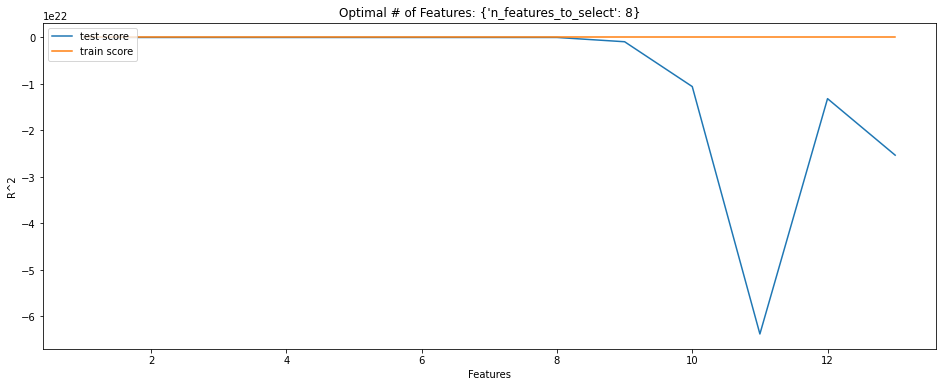

In [ ]:
# Create Cross-Validation Scheme:
folds = KFold(n_splits = 10, shuffle = True, random_state = 1)

# Specify the Range of Hyperparameters to Tune:
hyper_params = [{'n_features_to_select': list(range(1, 9))}] # for faster results

# Perform Grid Search using Linear Regression Model:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)
model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring = 'r2', cv = folds, verbose = 1, return_train_score=True)
model_cv.fit(X_train, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

# Plot the Results:
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('Features')
plt.ylabel('R^2')
plt.title(f"Optimal # of Features: {model_cv.best_params_}")
plt.legend(['test score', 'train score'], loc='upper left')

<font color='red'> **Answer:**</font>

**1.3.2  Please apply L1 (Lasso) regularization with variable alpha parameters and report the corresponding alpha value and R<sup>2</sup> value. Use the training split from ```1.1.4``` (1.5 point)**

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.linear_model import Lasso, Ridge

X = mode_df.drop("SalePrice", axis = 1)
y = mode_df["SalePrice"]
cross_val_scores_lasso = []

# List to maintain the different values of alpha
alpha = [] 

# Loop to for different alpha value
for i in range(1, 9):
  lassoModel = Lasso(alpha = i * 0.0001)
  lassoModel.fit(X_train, y_train)
  scores = cross_val_score(lassoModel, X, y, cv = 10)
  avg_cross_val_score = mean(scores)*100
  cross_val_scores_lasso.append(avg_cross_val_score)
  alpha.append(i * 0.0001)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
  print(str(alpha[i]) + ' : ' + str(cross_val_scores_lasso[i]))

0.0001 : 86.42954050791698
0.0002 : 86.97591496958829
0.00030000000000000003 : 87.28265401303423
0.0004 : 87.40559927644247
0.0005 : 87.42756516577529
0.0006000000000000001 : 87.39979079475322
0.0007 : 87.35770372635801
0.0008 : 87.28375816981429


<font color='red'> **Answer:**</font>

**1.3.3. Take the best alpha value from ```1.3.2``` and use it to train a new lasso model and report the  R<sup>2</sup> value on test set. Use the train test split from ```1.1.4```. (0.5 point)**

In [45]:
from sklearn.model_selection import train_test_split

# Building and fitting the Lasso Regression Model
lassoModelBest = Lasso(alpha = 0.0005)
lassoModelBest.fit(X_train, y_train)

# Evaluating the Lasso Regression model
print(lassoModelBest.score(X_test, y_test))

0.9023691872903872


<font color='red'> **Answer:**</font>

**1.3.4.  Please apply L2 (Ridge) regularization with variable alpha parameters and report the corresponding alpha value and R<sup>2</sup> value. Use the training split from ```1.1.4``` (1.5 point)**

N.B. The $alpha$ here in the ridge regularization is the same as $lambda$ you saw in the lecture. We did not initiate the variable with $lambda$ because $lambda$ is a reserved keyword in python which is used to create small anonymous functions. A $lambda$ function can take any number of arguments, but can only have one expression.
You can read more about it here: https://www.w3schools.com/python/ref_keyword_lambda.asp#:~:text=The%20lambda%20keyword%20is%20used,and%20the%20result%20is%20returned.

In [46]:
cross_val_scores_ridge = []

# List to maintain the different values of alpha
alpha = []

# Loop to for different alpha value
for i in range(1, 9):
  ridgeModel = Ridge(alpha = i * 0.0001)
  ridgeModel.fit(X_train, y_train)
  scores = cross_val_score(ridgeModel, X, y, cv = 10) #TODO
  avg_cross_val_score = mean(scores)*100
  cross_val_scores_ridge.append(avg_cross_val_score)
  alpha.append(i * 0.0001)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
  print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.0001 : 84.65071165365036
0.0002 : 84.65177677646632
0.00030000000000000003 : 84.65284079304215
0.0004 : 84.6539037055399
0.0005 : 84.6549655160851
0.0006000000000000001 : 84.6560262267847
0.0007 : 84.65708583975578
0.0008 : 84.65814435711059


<font color='red'> **Answer:**</font>

**1.3.5. Take the best alpha value from ```1.3.4``` and use it to train a new ridge model and report the  R<sup>2</sup> value on test set. Use the train test split from ```1.1.4```. (0.5 point)**

In [47]:
from sklearn.model_selection import train_test_split

# Building and fitting the Ridge Regression Model
ridgeModelBest = Ridge(alpha = 0.0008)
ridgeModelBest.fit(X_train, y_train)

# Evaluating the ridge Regression model
print(ridgeModelBest.score(X_test, y_test))

0.853893725649357


<font color='red'> **Answer:**</font>

## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.


<font color='red'> **Answer: didn't count but a lot!**</font> 

## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer: 10**</font>